# 01 — EDA (Superstore Sales)
Цель: первичный анализ, очистка и сохранение processed CSV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set(style='whitegrid')

In [2]:
# Путь к данным 
file_path = '/Users/evgenijbyhovcov/python projects/big data projects/final project_superstore_bigdata /data/raw/SampleSuperstore.csv'
df = pd.read_csv(file_path, encoding='latin1', parse_dates=['Order Date', 'Ship Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Размер данных
print('Shape:', df.shape)

df.info()

df.describe()

Shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [4]:
# Уникальность ключевых полей
print('Unique orders:', df['Order ID'].nunique())
print('Unique customers:', df['Customer ID'].nunique())
print('Unique products:', df['Product ID'].nunique())

Unique orders: 5009
Unique customers: 793
Unique products: 1862


In [5]:
# Пропуски
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
# Дубликаты
print('Row ID unique:', df['Row ID'].is_unique)
print('Full duplicated rows:', df.duplicated().sum())

Row ID unique: True
Full duplicated rows: 0


In [7]:
# Проверка логики дат и чисел
print('Ship Date < Order Date:', (df['Ship Date'] < df['Order Date']).sum())
print('Negative sales:', (df['Sales'] < 0).sum())
print('Negative profit:', (df['Profit'] < 0).sum())

Ship Date < Order Date: 0
Negative sales: 0
Negative profit: 1871


In [8]:
# Приведение типов
# Postal Code как string
if df['Postal Code'].dtype != 'object':
    try:
        df['Postal Code'] = df['Postal Code'].astype('Int64').astype('str')
    except Exception:
        df['Postal Code'] = df['Postal Code'].astype('str')

# Привести даты к datetime
# (в read_csv уже указано parse_dates, но проверим)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

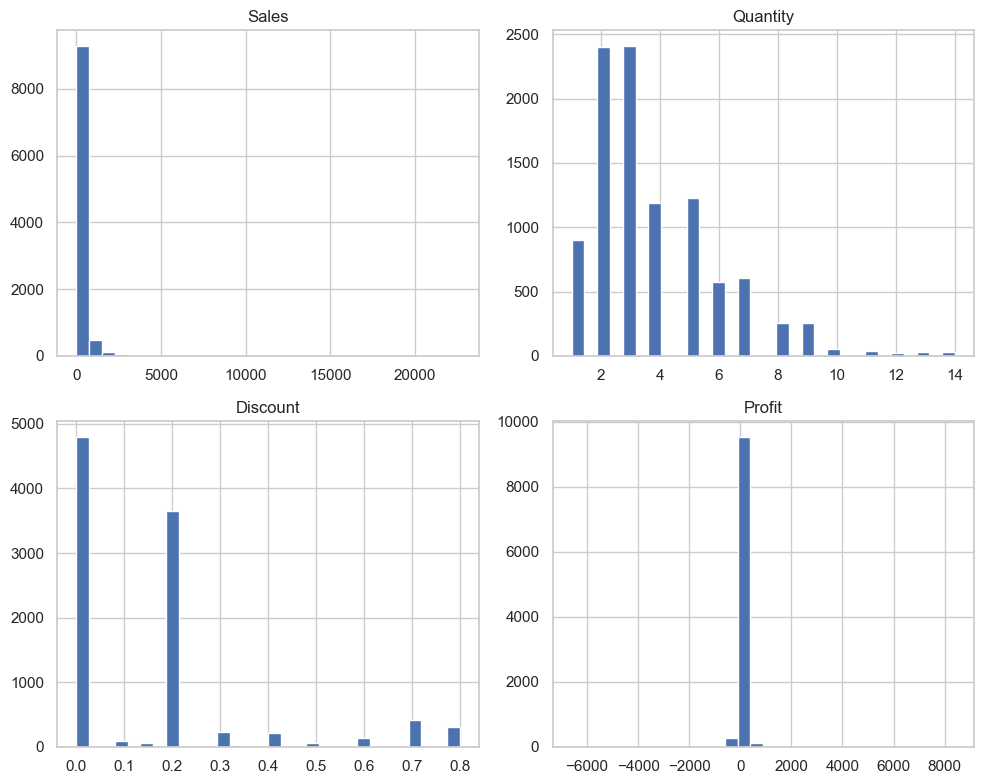

In [9]:
# Базовая статистика и распределения
cols = ['Sales','Quantity','Discount','Profit']
df[cols].hist(bins=30, figsize=(10,8))
plt.tight_layout()
plt.show()

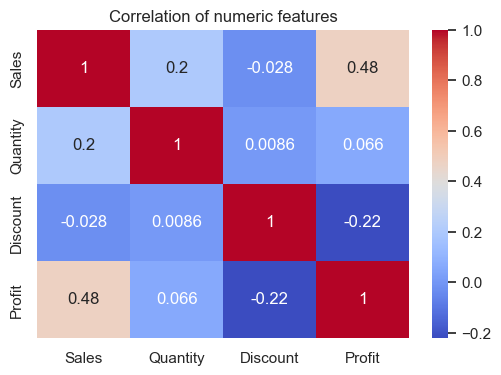

In [10]:
# Корреляции
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of numeric features')
plt.show()

In [11]:
# Категории и регионы
print('Categories:', df['Category'].unique())
print('Sub-categories count:', df['Sub-Category'].nunique())
print('Regions:', df['Region'].unique())

Categories: ['Furniture' 'Office Supplies' 'Technology']
Sub-categories count: 17
Regions: ['South' 'West' 'Central' 'East']


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


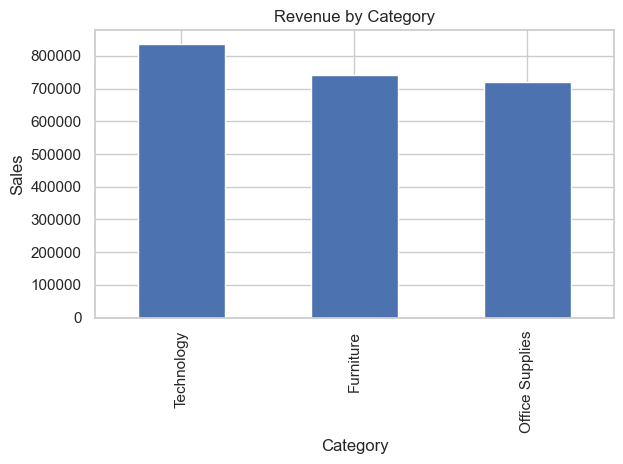

In [12]:
# Sales by category
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(cat_sales)
cat_sales.plot(kind='bar', title='Revenue by Category', ylabel='Sales')
plt.tight_layout(); plt.show()

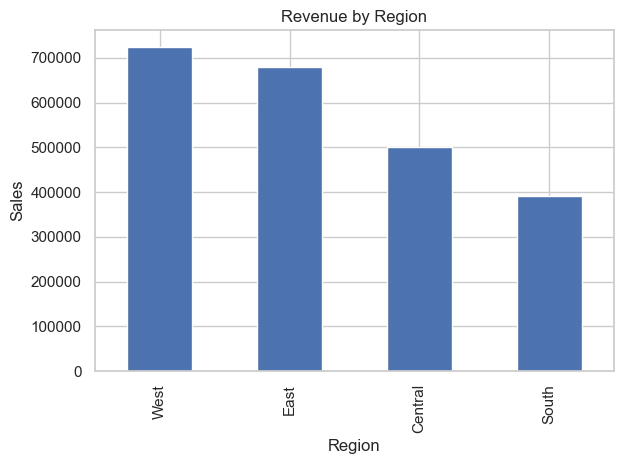

In [13]:
# Sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Revenue by Region', ylabel='Sales')
plt.tight_layout(); plt.show()

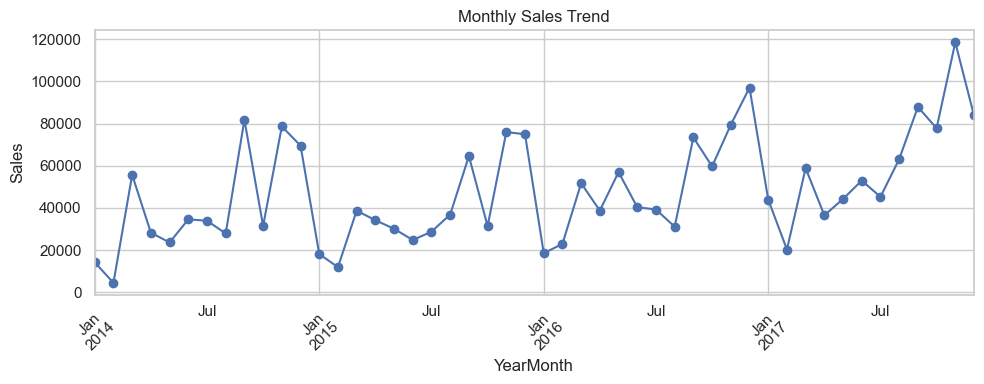

In [14]:
# Monthly sales trend
DF = df.copy()
DF['YearMonth'] = DF['Order Date'].dt.to_period('M')
monthly_sales = DF.groupby('YearMonth')['Sales'].sum()
monthly_sales.plot(marker='o', figsize=(10,4), title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('YearMonth')
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

In [15]:
# Save cleaned dataset
out = '../data/processed/superstore_clean.csv'
DF.to_csv(out, index=False)
print('Saved cleaned dataset to', out)

Saved cleaned dataset to ../data/processed/superstore_clean.csv
